In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from hetero.algo import align_binary_labels, group
from hetero.config import (
    DEFAULT_GROUP_REWARD_COEFF_OVERRIDE,
    DTYPE,
    AlgoConfig,
    DataGenConfig,
    DimConfig,
    GroupingConfig,
)
from hetero.datagen import generate_data_from_config
from hetero.policies import AllPosPolicy, AlternativePolicy
from hetero.utils import LabelPartitioner, remove_outlier

=====================================================================================================

In [3]:
# Linear setting hence no expansion settings.
# N=100 and N=30.

data_config = DataGenConfig(
    num_trajectories=100,
    num_time_steps=30,
    group_reward_coeff_override=np.array(
        [
            [-2.68, 2.68],
            [2.68, -2.68],
        ],
        dtype=DTYPE,
    ),
    action_reward_coeff=[-2.89, 2.89],
)
data = generate_data_from_config(data_config)
pi_eval = AlternativePolicy(data_config.NUM_ACTIONS)
discount = 0.6

In [4]:
from hetero.algo import beta_from_linreg
from hetero.utils import action_feature_prod

Z = action_feature_prod(data.actions, data.current_features)
pi_eval_actions = pi_eval.action(data.next_features)
U = action_feature_prod(pi_eval_actions, data.next_features)
print(Z.shape, U.shape)
beta = beta_from_linreg(data, Z, U, discount)
print(beta.shape)

(6000, 4) (6000, 4)
(200, 4)


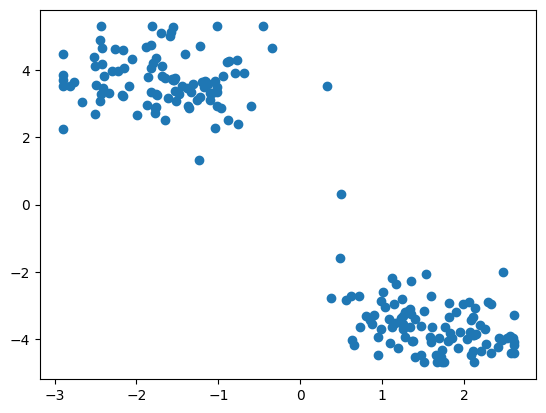

In [5]:
# Trajectory wise regression betas, only for demo.

init_beta = remove_outlier(beta, 2, 98)
plt.scatter(init_beta[:, 0], init_beta[:, 1])

In [6]:
# Compute trajectory wise betas with optimizer

from hetero.algo import BetaOptimizer, MCPImpl

base_config = dict(
    discount=discount,
    gam=2.7,
    #rho=2.0,
    max_num_iters=10,
    nu_coeff=1e-4,
    delta_coeff=1e-4,
    use_group_wise_regression_init=True,
    should_remove_outlier=False,
)


In [7]:
lam_list = [3.6, 1.6, 0.6]
rho_list = [100.0, 2.0, 6.0]

In [8]:
lam = lam_list[0]
rho = rho_list[0]

lam_and_beta = {}
lam_and_learned_labels = {}

algo_config = AlgoConfig(lam=lam, rho=rho, **base_config)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_and_beta[lam] = beta_opt.compute()

learned_labels = group(lam_and_beta[lam], GroupingConfig())
truth = np.array([x[0] for x in data.partitioner.index_to_label_mapping()])
aligned_labels = align_binary_labels(learned_labels, truth)
print("Label mismatch =", (aligned_labels != truth).sum())
lam_and_learned_labels[lam] = aligned_labels

beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=8951, num_below=10949
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=8429, num_below=11471
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=7774, num_below=12126
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=5232, num_below=14668
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=1165, num_below=18735
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=183, num_below=19717
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=560, num_below=19340
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=1365, num_below=18535
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=159, num_below=19741
beta_solver, min eigen of left matrix = (0.443310

In [9]:
lam = lam_list[1]
rho = rho_list[1]

algo_config = AlgoConfig(lam=lam, rho=rho, **base_config)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_and_beta[lam] = beta_opt.compute()

learned_labels = group(lam_and_beta[lam], GroupingConfig())
truth = np.array([x[0] for x in data.partitioner.index_to_label_mapping()])
aligned_labels = align_binary_labels(learned_labels, truth)
print("Label mismatch =", (aligned_labels != truth).sum())
lam_and_learned_labels[lam] = aligned_labels

beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=11930, num_below=7970
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10819, num_below=9081
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10503, num_below=9397
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10358, num_below=9542
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10320, num_below=9580
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10311, num_below=9589
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10306, num_below=9594
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10314, num_below=9586
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=10322, num_below=9578
beta_solver, min eigen of left matrix = (0.443

In [10]:
lam = lam_list[2]
rho = rho_list[2]

algo_config = AlgoConfig(lam=lam, rho=rho, **base_config)
impl = MCPImpl(data.N(), algo_config)
beta_opt = BetaOptimizer(data, algo_config, pi_eval, impl)
lam_and_beta[lam] = beta_opt.compute()

learned_labels = group(lam_and_beta[lam], GroupingConfig())
truth = np.array([x[0] for x in data.partitioner.index_to_label_mapping()])
aligned_labels = align_binary_labels(learned_labels, truth)
print("Label mismatch =", (aligned_labels != truth).sum())
lam_and_learned_labels[lam] = aligned_labels

beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=18252, num_below=1648
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=18153, num_below=1747
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=18054, num_below=1846
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17991, num_below=1909
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17934, num_below=1966
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17900, num_below=2000
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17866, num_below=2034
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17836, num_below=2064
beta_solver, min eigen of left matrix = (0.4433107-0.003586896j)
MCPImpl: num_above=17812, num_below=2088
beta_solver, min eigen of left matrix = (0.443

In [11]:
# Compute group (pool trajectories of the same group together) wise regression betas.

from hetero import tasks

grouped_beta = tasks.beta_estimate_from_new_labels(
    data, [x[0] for x in data.labels], pi_eval, algo_config.discount
)[0]

new_labels.length=6000 matches number of records


In [12]:
# Use the clustered labels to compute cluster wise regression betas.
# Note that when the clusters are perfect, we will have:
# grouped_beta == clustered_beta

In [13]:
# Truth is stored in truch with shape: 
truth.shape

(200,)

/var/folders/w6/sp20vq8s50z2h77z6ny7mh700000gn/T/ipykernel_22165/2516320530.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=mpl.cm.get_cmap('tab20')(19),
/var/folders/w6/sp20vq8s50z2h77z6ny7mh700000gn/T/ipykernel_22165/2516320530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color=mpl.cm.get_cmap('tab20')(0),


<Figure size 640x480 with 0 Axes>

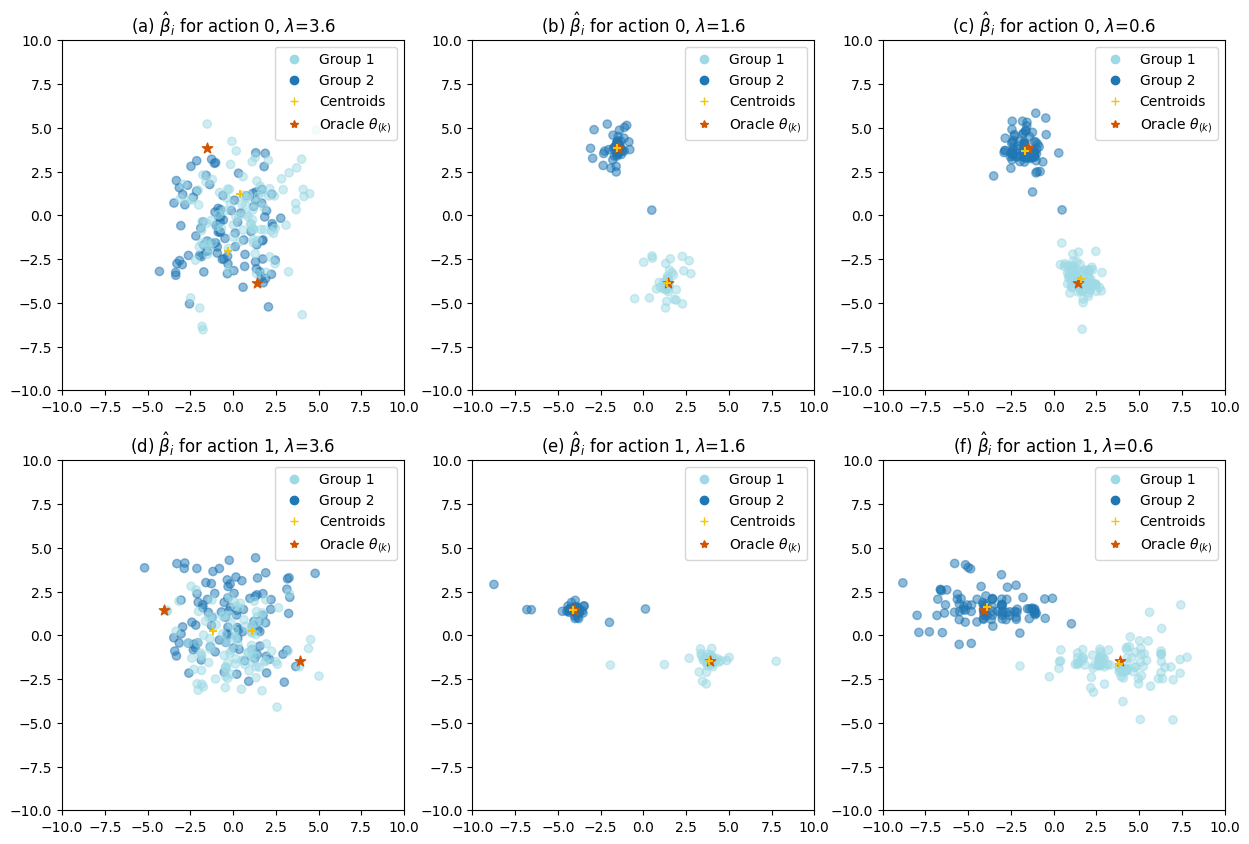

In [14]:
from matplotlib.lines import Line2D
import matplotlib as mpl

legend_elements = [Line2D([], [], 
                          color=mpl.cm.get_cmap('tab20')(19), 
                          marker='o', 
                          linestyle='None',
                          label='Group 1'),
                   Line2D([], [], 
                          color=mpl.cm.get_cmap('tab20')(0),
                          marker='o', 
                          linestyle='None',
                          label='Group 2'),
                   Line2D([], [], 
                          color='#F1C40F',
                          #markersize=30,
                          marker='+', 
                          linestyle='None',
                          label='Centroids'),
                   Line2D([], [], 
                          color='#D35400', 
                          #markersize=60,
                          marker='*', 
                          linestyle='None',
                          label='Oracle $\\theta_{(k)}$')]

#subs = [241, 242, 243, 244, 245, 246, 247, 248]
subs = [231, 232, 233, 234, 235, 236]
caps = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
all_lams = list(lam_and_beta.keys())
all_lams.sort(reverse=True)
all_lams += all_lams
assert len(subs) == len(all_lams)

plt.set_cmap('tab20')
fig = plt.figure(figsize=[15, 10])

for sub, lam, cap in zip(subs, all_lams, caps):
    ax = fig.add_subplot(sub)
    if sub % 10 in [1, 2, 3]:
        ax.scatter(
            lam_and_beta[lam][:, 0], 
            lam_and_beta[lam][:, 1], 
            c=truth, 
            #s=3, 
            #marker="x",
            alpha=0.5
        )
        beta_text = f"{cap} $\\hat\\beta_i$ for action $0$"
        ax.scatter(
            grouped_beta.betas[0][0],
            grouped_beta.betas[0][1],
            c='#D35400', # red
            s=60,
            marker="*",
        )
        ax.scatter(
            grouped_beta.betas[1][0],
            grouped_beta.betas[1][1],
            c='#D35400',
            s=60,
            marker="*",
        )

        masks = [
            [x == cluster for x in lam_and_learned_labels[lam]] for cluster in range(2)
        ]
        clustered_mean_beta = [
            lam_and_beta[lam][mask, :].mean(axis=0) for mask in masks
        ]
        ax.scatter(
            clustered_mean_beta[0][0],
            clustered_mean_beta[0][1],
            c='#F1C40F',  # yellow
            s=30,
            marker="+", 
        )
        ax.scatter(
            clustered_mean_beta[1][0],
            clustered_mean_beta[1][1],
            c='#F1C40F',
            s=30,
            marker="+",
        )
        
        ax.legend(handles=legend_elements, loc='upper right')
    else:
        ax.scatter(
            lam_and_beta[lam][:, 2], 
            lam_and_beta[lam][:, 3], 
            c=truth, 
            #s=3, 
            #marker="x",
            alpha=0.5
        )
        beta_text = f"{cap} $\\hat\\beta_i$ for action $1$"
        ax.scatter(
            grouped_beta.betas[0][2],
            grouped_beta.betas[0][3],
            c='#D35400', # red
            s=60,
            marker="*",
        )
        ax.scatter(
            grouped_beta.betas[1][2],
            grouped_beta.betas[1][3],
            c='#D35400', # red
            s=60,
            marker="*",
        )

        masks = [
            [x == cluster for x in lam_and_learned_labels[lam]] for cluster in range(2)
        ]
        clustered_mean_beta = [
            lam_and_beta[lam][mask, :].mean(axis=0) for mask in masks
        ]
        ax.scatter(
            clustered_mean_beta[0][2],
            clustered_mean_beta[0][3],
            c='#F1C40F',  # yellow
            s=30,
            marker="+", 
        )
        ax.scatter(
            clustered_mean_beta[1][2],
            clustered_mean_beta[1][3],
            c='#F1C40F',  # yellow
            s=30,
            marker="+", 
        )
        ax.legend(handles=legend_elements, loc='upper right')

    ax.title.set_text(beta_text + f", $\lambda$={lam}")
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

plt.savefig(f'results/linear_split.pdf', bbox_inches='tight')
plt.show()

# Done!